# Практическое задание к Уроку 6. Градиентный бустинг (AdaBoost)

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#### Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
def result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    # обучение
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    # вывод результатов
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    # вывод графика
    get_error_plot(n_trees, train_errors, test_errors)

**Решение**

Количество

Ошибка алгоритма из 3 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 3207.5265126647205
Ошибка алгоритма из 3 деревьев глубиной 1     с шагом 1 на тестовой выборке: 4071.492378528311


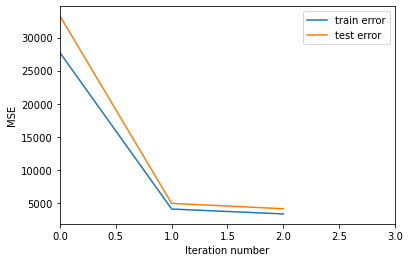

In [11]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2665.567294591109
Ошибка алгоритма из 9 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3830.0034965979135


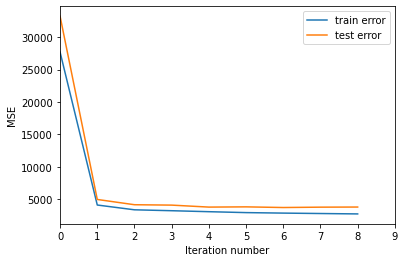

In [12]:
# Число деревьев в ансамбле
n_trees = 9

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 12 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2525.6810962400928
Ошибка алгоритма из 12 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3732.7687700309325


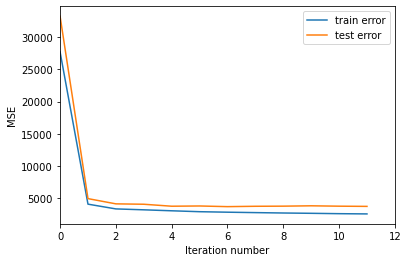

In [13]:
# Число деревьев в ансамбле
n_trees = 12

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 35 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2026.1113620891645
Ошибка алгоритма из 35 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3650.4603552245976


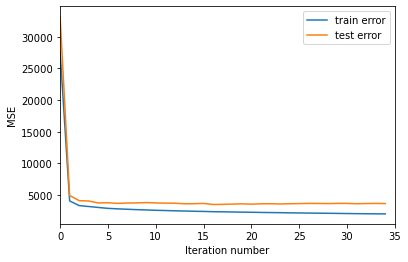

In [14]:
# Число деревьев в ансамбле
n_trees = 35

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

**Вывод:** Излишнее количество деревьев увеличивает вероятность переобучения.

Глубина

Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2614.58994041287
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3999.0622545771516


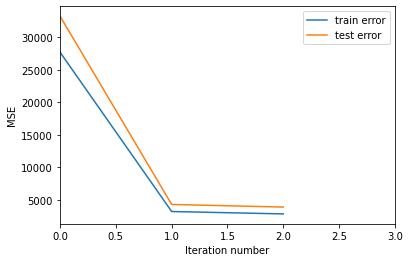

In [15]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 411.2527985095375
Ошибка алгоритма из 9 деревьев глубиной 4     с шагом 1 на тестовой выборке: 6101.818721185657


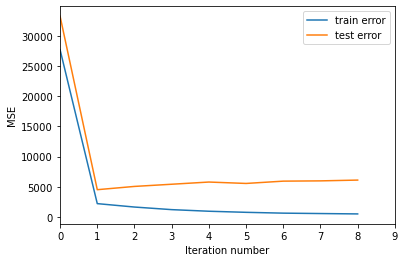

In [16]:
# Число деревьев в ансамбле
n_trees = 9

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 12 деревьев глубиной 12     с шагом 1 на тренировочной выборке: 0.0
Ошибка алгоритма из 12 деревьев глубиной 12     с шагом 1 на тестовой выборке: 6023.180050596473


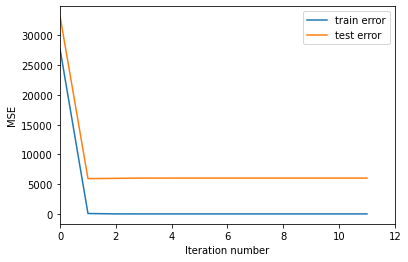

In [17]:
# Число деревьев в ансамбле
n_trees = 12

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 12

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 35 деревьев глубиной 20     с шагом 1 на тренировочной выборке: 0.0
Ошибка алгоритма из 35 деревьев глубиной 20     с шагом 1 на тестовой выборке: 6670.972972972973


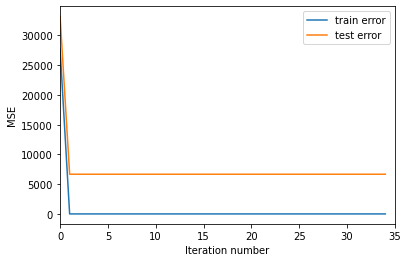

In [18]:
# Число деревьев в ансамбле
n_trees = 35

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 20

# Шаг
eta = 1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

**Вывод:** Увеличение глубины дерева увеличивает ошибку на тестовой выборке. Наименьшая ошибка была у глубины дерева = 1.

Шаг

Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 0.5 на тренировочной выборке: 3092.644057512585
Ошибка алгоритма из 3 деревьев глубиной 2     с шагом 0.5 на тестовой выборке: 4638.623399156409


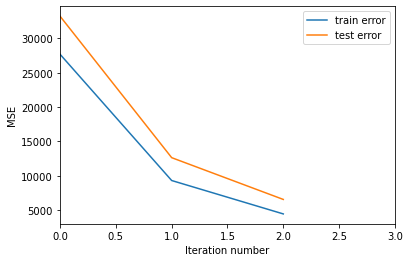

In [19]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 2

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 9 деревьев глубиной 4     с шагом 0.5 на тренировочной выборке: 797.9717204576511
Ошибка алгоритма из 9 деревьев глубиной 4     с шагом 0.5 на тестовой выборке: 4302.682253787421


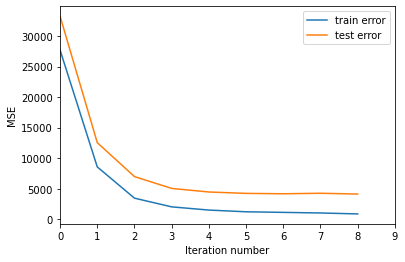

In [20]:
# Число деревьев в ансамбле
n_trees = 9

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 12 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2556.139852557571
Ошибка алгоритма из 12 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3525.7605950194306


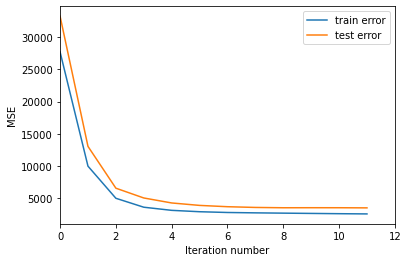

In [21]:
# Число деревьев в ансамбле
n_trees = 12

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Ошибка алгоритма из 25 деревьев глубиной 1     с шагом 0.5 на тренировочной выборке: 2320.7061270586537
Ошибка алгоритма из 25 деревьев глубиной 1     с шагом 0.5 на тестовой выборке: 3363.604951268927


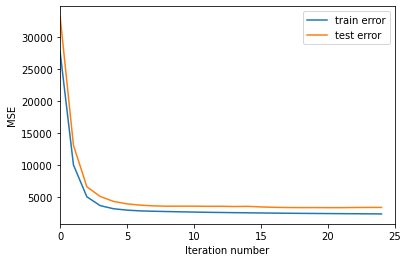

In [22]:
# Число деревьев в ансамбле
n_trees = 25

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 5e-1

result(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

**Вывод:** Наименьшая ошибка на тестовой выборке определяется при наименьшей глубине, увеличенном шаге и повышенном количестве деревьев. При прочих равных, для количества деревьев 30, 40 или 60 ошибка по тествовой выборке увеличивается. 

#### Задание 2: (опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [23]:
X, y = load_diabetes(return_X_y=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [26]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [27]:
def bias(y, z):
    return (y - z)

Решение

In [28]:
# 2. Так как gb - стохастический, количество объектов в батче должно быть = 1
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    test_errors = []
        
    n_test = X_test.shape[0]
    n_batch_test = n_test // qty_in_batch
    if n_test % qty_in_batch != 0:
        n_batch_test += 1
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
                
        for b in range(n_batch_test):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            
            X_tmp_test = X_test[start_ : end_]
            y_tmp_test = y_test[start_ : end_]
            
            if len(trees) == 0:
                tree.fit(X_tmp_test, y_tmp_test)
                test_errors.append([i, mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta))])
                
            else:
                target = gb_predict(X_tmp_test, trees, coefs, eta)
                tree.fit(X_tmp_test, bias(y_tmp_test, target))
                test_errors.append([i, mean_squared_error(y_tmp_test, gb_predict(X_tmp_test, trees, coefs, eta))])
                
        trees.append(tree)
    
    return np.array(test_errors)

In [29]:
def get_error_plot(test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
#     plt.xlim(0, n_trees)
#     plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(test_err[:,0], test_err[0,1], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [30]:
n_trees = 40
eta = 2e-1
coefs = [1]*n_trees
max_depth = 1

In [31]:
test_1 = gb_fit(
    n_trees=n_trees, 
    max_depth=max_depth, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test, 
    coefs=coefs, 
    eta=eta, 
    qty_in_batch=3
)

In [32]:
test_2 = gb_fit(
    n_trees=n_trees, 
    max_depth=max_depth, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test, 
    coefs=[1]*n_trees, 
    eta=eta, 
    qty_in_batch=9
)

In [33]:
test_3 = gb_fit(
    n_trees=n_trees, 
    max_depth=max_depth, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test, 
    coefs=[1]*n_trees, 
    eta=eta, 
    qty_in_batch=35
)

Резульататы 1й выборки: 0.007347298290766416
Резульататы 2й выборки: 0.007347298290766416
Резульататы 3й выборки: 3.9450671451300305


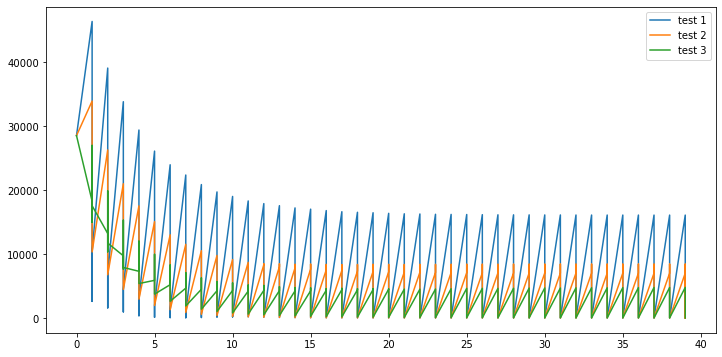

In [34]:
print(f'Резульататы 1й выборки: {test_1[-1, 1]}')
print(f'Резульататы 2й выборки: {test_2[-1, 1]}')
print(f'Резульататы 3й выборки: {test_3[-1, 1]}')

plt.figure(figsize=(12, 6))
plt.plot(test_1[:,0], test_1[:,1], label='test 1')
plt.plot(test_2[:,0], test_2[:,1], label='test 2')
plt.plot(test_3[:,0], test_3[:,1], label='test 3')
plt.legend(loc='upper right')
plt.show()

**Вывод:** Чем больше объектов, тем ниже разброс и точность.

#### Задание 3: (опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.